# BOX FOR IMPORTING SHIT

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

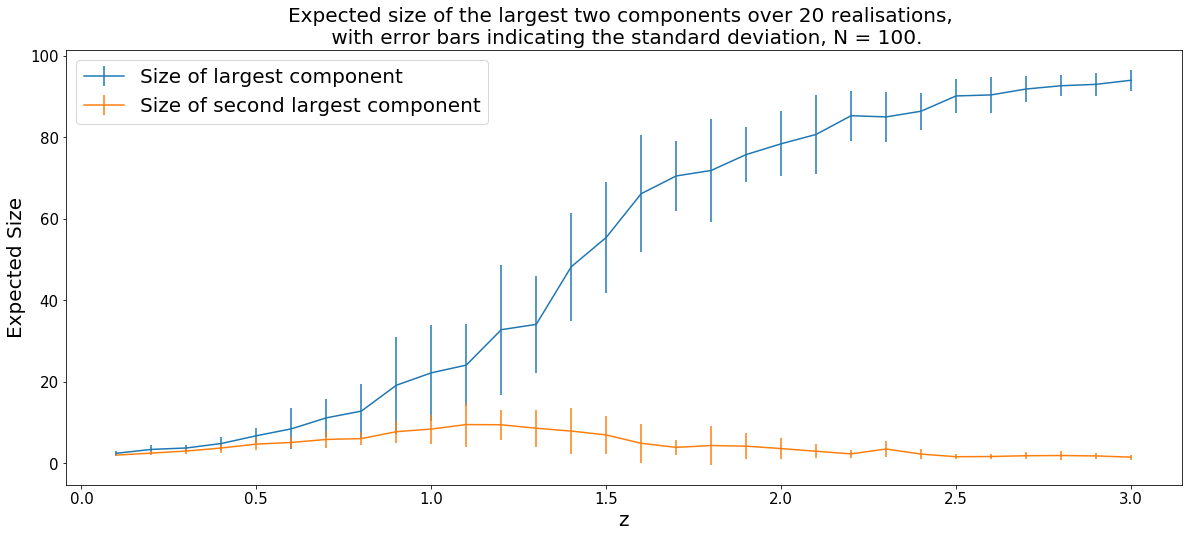

In [224]:
z = np.arange(0.1, 3.1, 0.1)
N=100
realisations = 20
p = z/N
S1 = np.zeros((len(p), realisations))
S2 = np.zeros((len(p), realisations))

for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        Components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        S1[index,i] = len(Components[0]) #first part of 2.5 apparently
        S2[index,i] = len(Components[1])

Expected_S1 = np.mean(S1, axis = 1)
S1_dev = np.std(S1, axis = 1)
Expected_S2 = np.mean(S2, axis = 1)
S2_dev = np.std(S2, axis = 1)


plt.figure(figsize = (20,8))
plt.errorbar(z, Expected_S1, yerr = S1_dev, label = "Size of largest component")
plt.errorbar(z, Expected_S2, yerr = S2_dev, label = "Size of second largest component")
plt.ylabel("Expected Size", fontsize = 20)
plt.xlabel("z", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title("Expected size of the largest two components over 20 realisations, \n with error bars indicating the standard deviation, N = 100.", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 20)

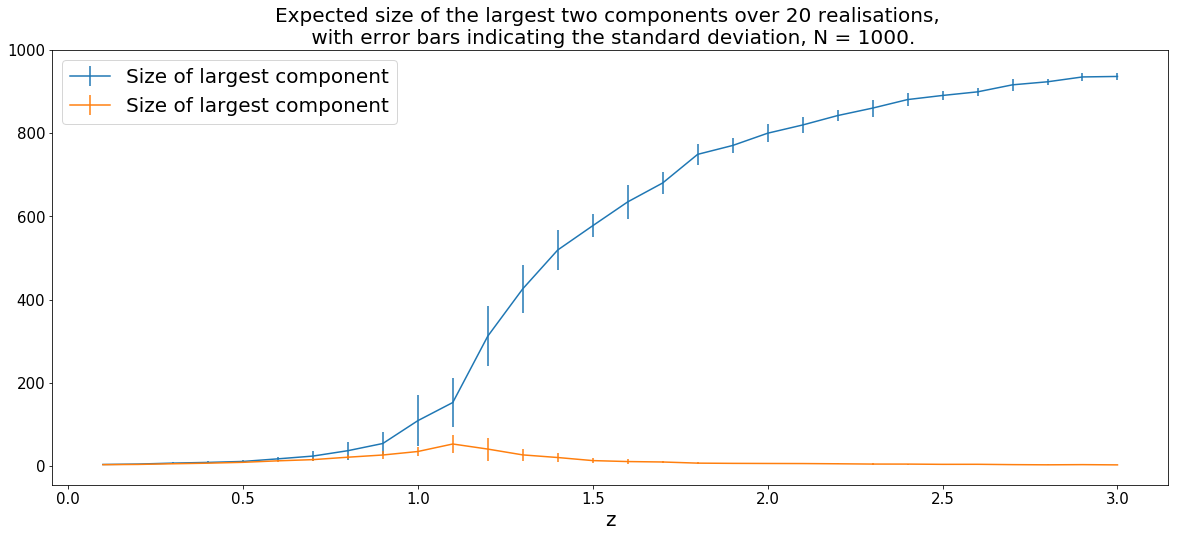

In [226]:
z = np.arange(0.1, 3.1, 0.1)
N=1000
realisations = 20
p = z/N
S1 = np.zeros((len(p), realisations))
S2 = np.zeros((len(p), realisations))

for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        Components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        S1[index,i] = len(Components[0]) #first part of 2.5 apparently
        S2[index,i] = len(Components[1])

Expected_S1 = np.mean(S1, axis = 1)
S1_dev = np.std(S1, axis = 1)
Expected_S2 = np.mean(S2, axis = 1)
S2_dev = np.std(S2, axis = 1)


plt.figure(figsize = (20, 8))
plt.errorbar(z, Expected_S1, yerr = S1_dev, label = "Size of largest component")
plt.errorbar(z, Expected_S2, yerr = S2_dev, label = "Size of largest component")

plt.xlabel("z", fontsize = 20)
plt.yticks([0, 200, 400, 600, 800, 1000], fontsize = 15)
plt.xticks(fontsize = 15)
plt.title("Expected size of the largest two components over 20 realisations, \n with error bars indicating the standard deviation, N = 1000.", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 20)

Text(0.5, 1.0, 'Expected local clustering coefficient averaged over 20 realisations, N = 1000.')

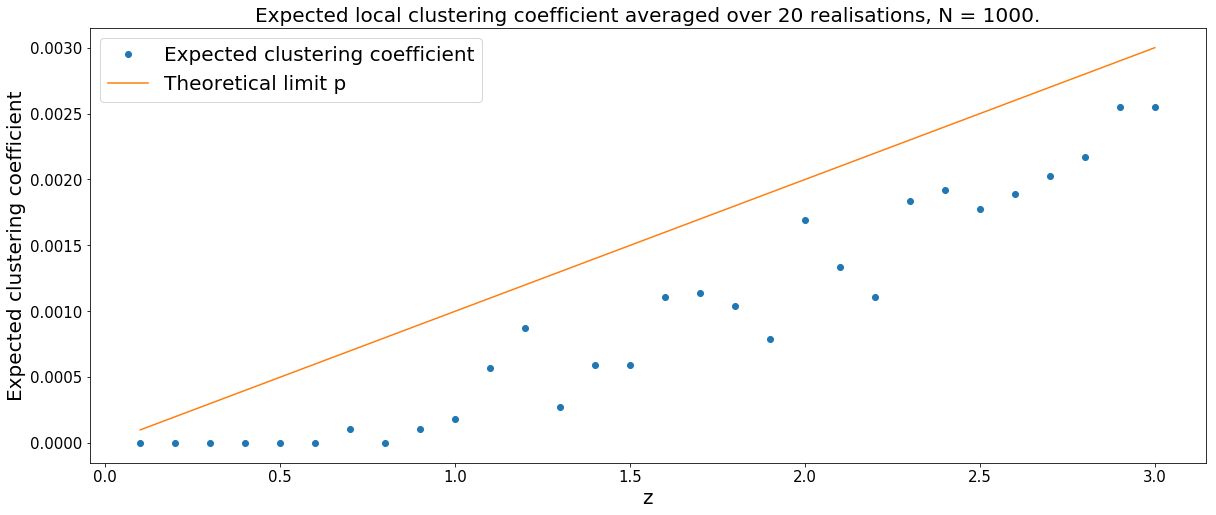

In [227]:
z = np.arange(0.1, 3.1, 0.1)
N=1000
realisations = 20
p = z/N
CC = np.zeros((len(p), realisations))

for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        c=nx.average_clustering(G)
        CC[index,i] = c
        
average_CC = np.mean(CC, axis = 1)

plt.figure(figsize = (20, 8))
plt.plot(z, average_CC, "o", label = "Expected clustering coefficient")
plt.plot(z, p, label = "Theoretical limit p")
plt.ylabel("Expected clustering coefficient", fontsize = 20)
plt.xlabel("z", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20)
plt.title("Expected local clustering coefficient averaged over 20 realisations, N = 1000.", fontsize = 20)

In [ ]:
z = 1
N=100
realisations = 20
p = z/N
degdist = np.zeros((len(p), realisations))

for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        c=nx.average_clustering(G)
        CC[index,i] = c

GER = G
vk = dict(GER.degree())
vk = list(vk.values()) # we get only the degree values
maxk = np.max(vk)
kvalues= np.arange(0,maxk+1) # possible values of k
Pk = np.zeros(maxk+1) # P(k)
for k in vk:
    Pk[k] = Pk[k] + 1
Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one


ks = kvalues

plt.figure()
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file

## Fitting of. binomial distribution
from scipy.stats import binom
pk = binom.pmf(ks, N, p)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

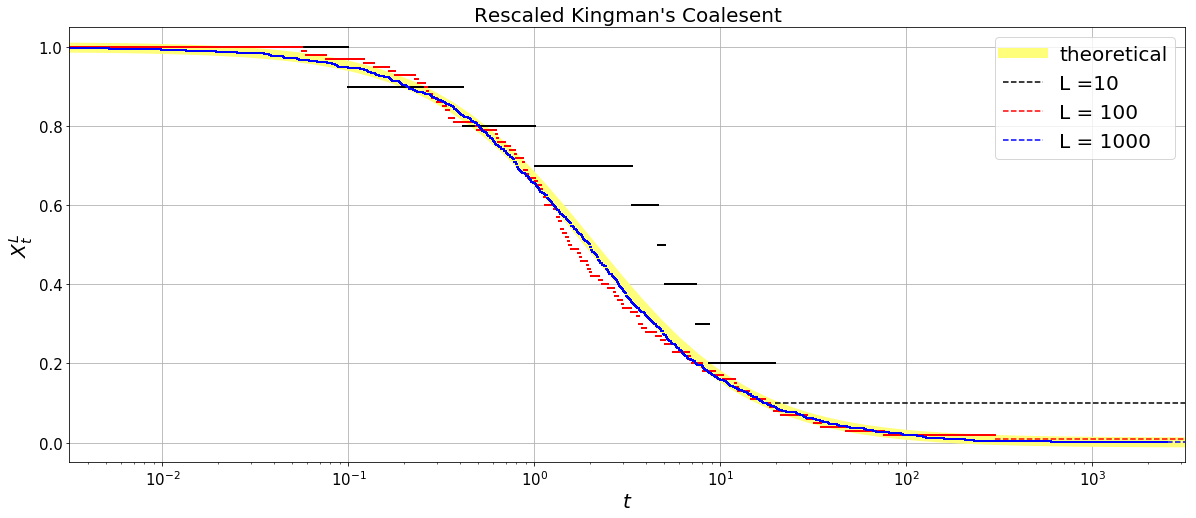

In [231]:
# sample paths of the process (2.1 d)

#theoretical 


thet = np.logspace(-3.5, 3.5, 70)
thex = np.zeros(len(thet))

for i in range(0, len(thet)):
    thex[i] = 2/(2+thet[i])
    
plt.figure(figsize = (20, 8))
plt.plot(thet, thex, '#FFFE7A', label = "theoretical", lw = 10)



LL = 10
time1=0.0 # initialize

for n in range(LL,1,-1):  
    λ = n*(n-1)/2
    β=1.0/λ # beta
    waitTime1=np.random.exponential(scale=β) # get a waiting time from exponential dist  

    plt.plot([time1*LL,(time1+waitTime1)*LL],[n/LL,n/LL],'k',lw=2) # plot a bit
    
    time1+=waitTime1 # update time

plt.plot([time1*LL,(time1+1000)*LL],[1/LL,1/LL],'k--', label = 'L =10') # also add this line


L=100

##### Simulate and PLOT ####

time=0.0 # initialize

for n in range(L,1,-1):  
    λ = n*(n-1)/2
    β=1.0/λ # beta
    waitTime=np.random.exponential(scale=β) # get a waiting time from exponential dist  

    plt.plot([time*L,(time+waitTime)*L],[n/L,n/L],'r',lw=2) # plot a bit
    
    time+=waitTime # update time
plt.plot([time*L,(time+1000)*L],[1/L,1/L],'r--', label = 'L = 100') # also add this line

    

LLL = 1000
time2=0.0 # initialize

for n in range(LLL,1,-1):  
    λ = n*(n-1)/2
    β=1.0/λ # beta
    waitTime2=np.random.exponential(scale=β) # get a waiting time from exponential dist  

    plt.plot([time2*LLL,(time2+waitTime2)*LLL],[n/LLL,n/LLL],'b',lw=2) # plot a bit
    
    time2+=waitTime2 # update time

plt.plot([time2*LLL,(time2+1000)*LLL],[1/LLL,1/LLL], 'b--', label = 'L = 1000') # also add this line
    
plt.title("Rescaled Kingman's Coalesent", fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$ X_t^L$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((10**-2.5, 10**3.5))

plt.yscale('linear') # linear y scale
plt.xscale('log') # change to log x scale
plt.grid()

In [170]:
##### Parameter/setup ######

alpha=1
sigma=1
x0=5 # initial condition

tmax=10.0 #max time

dt=0.01 # timestep

# np.random.seed(101) # for reproducability 

############################

times=np.arange(0.0,tmax,dt) # vector of times
length=np.shape(times)[0]

x=np.zeros(length) # vector to store x values
x[0]=x0

B=np.random.randn(length-1)*np.sqrt(dt) # the gaussian noise

for i in range(0,length-1): # simulate
    x[i+1]=x[i]-alpha*x[i]*dt+sigma*B[i]
    
    
    
    
dt=0.1 # timestep

# np.random.seed(101) # for reproducability 

############################

times2=np.arange(0.0,tmax+0.1,dt) # vector of times
length=np.shape(times2)[0]

x2=np.zeros(length) # vector to store x values
x2[0]=x0

B=np.random.randn(length-1)*np.sqrt(dt) # the gaussian noise

for i in range(0,length-1): # simulate
    x2[i+1]=x2[i]-alpha*x2[i]*dt+sigma*B[i]

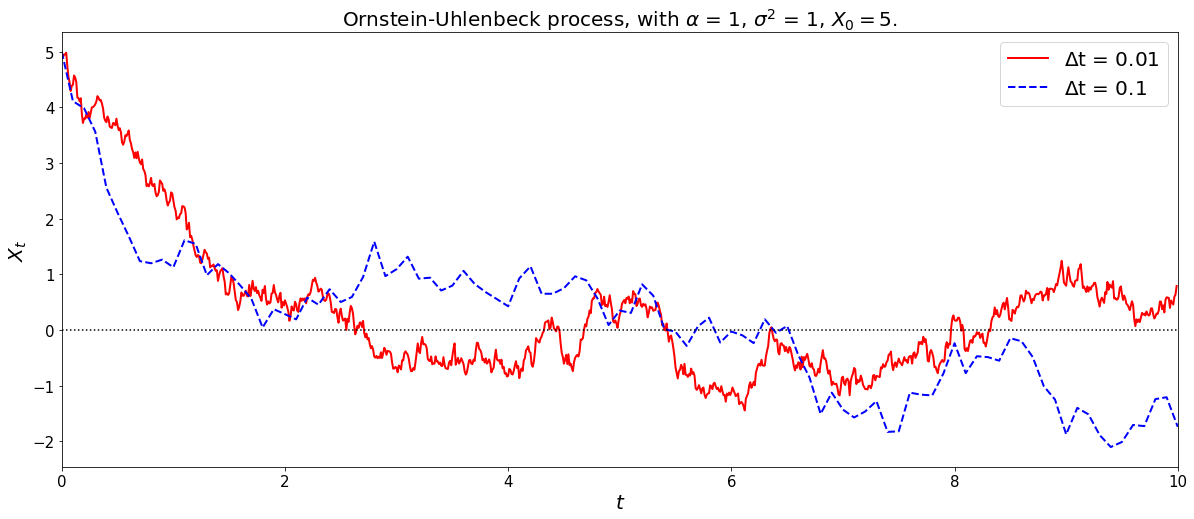

In [220]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(times,x,'r',lw=2, label = r'$\Delta$t = 0.01')
plt.plot(times2, x2, 'b--', lw=2, label = r'$\Delta$t = 0.1')
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$X_t$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title(r'Ornstein-Uhlenbeck process, with $\alpha$ = {}, $\sigma ^2$ = {}, $X_0 = 5$.'.format(alpha,sigma), fontsize = 20)
plt.xlim((0, 10))
plt.legend(fontsize = 20)
ax.axhline(0, linestyle = ':', color='k')

# ax.set_yticks([0.2, 0.6, 0.8], minor=False)
# plt.yticks([0.0])
# ax.yaxis.grid(True, which='major')
# plt.grid(axis = 'y')
plt.show()


In [12]:
m0 = 5 #initial number of nodes
m = 5 #5 edges added each time (preferential attachment)
N = 1000

def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
#     mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def one_cdf(data):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    return bin_edges[0:-1], np.ones(len(cdf))-cdf

([<matplotlib.axis.YTick at 0x7f2fe886c6a0>,
 <a list of 5 Text yticklabel objects>)

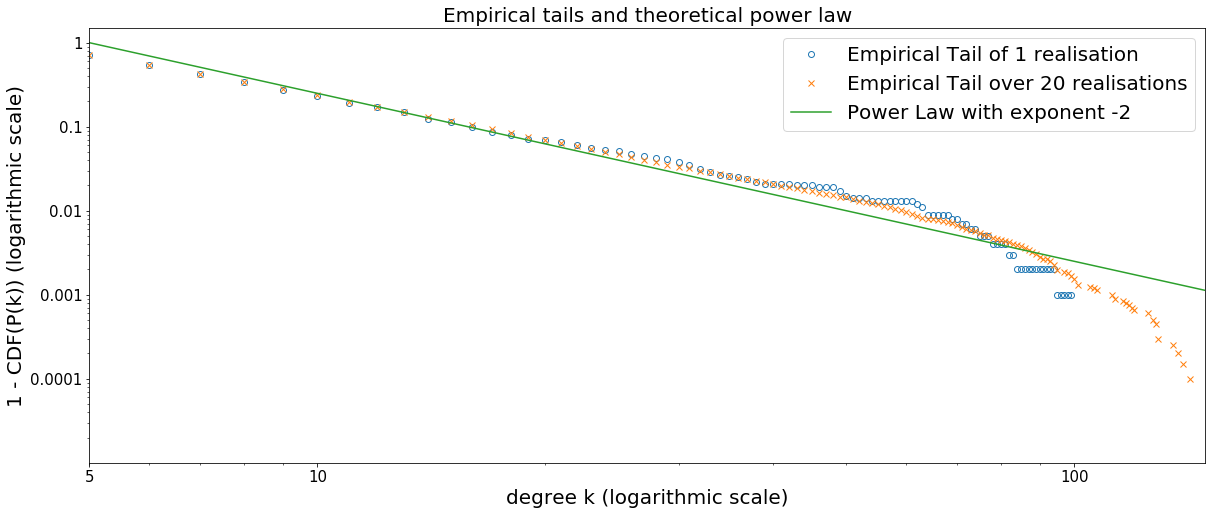

In [221]:
G = nx.barabasi_albert_graph(N, m)


realisations = 20
m = 5
N =1000
degrees = []
for r in range(realisations):
    G= nx.barabasi_albert_graph(N,m)
    Count_degree = list(dict(G.degree()).values())
    degrees.append(Count_degree)
degrees = np.array(degrees)
degrees = degrees.flatten()


mingbo, sith = degree_distribution(G)
# Count_degree = list(dict(G.degree()).values())

plt.figure(figsize = (20, 8))
cdf = np.cumsum(sith)
x = np.linspace(np.min(Count_degree),np.max(Count_degree),10000)
plt.plot(range(len(cdf)), np.ones(len(cdf))-cdf, 'o',
         fillstyle = 'none', label ='Empirical Tail of 1 realisation')



bins, deg = one_cdf(degrees)
plt.plot(bins, deg, 'x', fillstyle = 'none', label = 'Empirical Tail over 20 realisations')
Xx = np.linspace(min(degrees), max(degrees), 1000)
plt.plot(Xx, (np.min(degrees))**2*Xx**(-2), label = 'Power Law with exponent -2')
# plt.plot(x, 10*x**(-2), label = 'power law')

plt.legend(fontsize = 20)

plt.xscale('log')
plt.yscale('log')
plt.xlim([np.min(degrees),np.max(degrees)])


plt.title('Empirical tails and theoretical power law', fontsize = 20)
plt.ylim(10**-5, 1.5)

plt.xlabel('degree k (logarithmic scale)', fontsize = 20)
plt.xticks([np.min(degrees), 10, 100], [np.min(degrees), 10, 100], fontsize = 15)
plt.ylabel('1 - CDF(P(k)) (logarithmic scale)', fontsize = 20)
plt.yticks([10**0, 10**-1, 10**-2, 10**-3, 10**-4], [1, 0.1, 0.01, 0.001, 0.0001], fontsize = 15)

# plt.xlim([np.min(Count_degree),np.max(Count_degree)])

# plt.legend(fontsize = 12)
# plt.xlim([0, 100])
# points are always better than lines


In [113]:
N = 1000
av_degree = 2
p = av_degree/N
G = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [108]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
#     maxk = np.max(vk)
    maxk = 15
#     mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [161]:
N = 1000
av_degree = 2
p = av_degree/N


maxk = 10

kvalues= np.arange(0,maxk+1) # possible values of k
Pk = np.zeros(maxk+1) # P(k)
stdmatrix = np.zeros((11, 20))
                     
for realisation in range(0, 20):
    G = nx.gnp_random_graph(N, p, seed=None, directed=False)
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    for k in vk:
        stdmatrix[k, realisation] = stdmatrix[k, realisation] + 1
        Pk[k] = Pk[k] + 1
    sumstd = sum(stdmatrix[:, realisation])
    stdmatrix[:, realisation] = stdmatrix[:, realisation]/sumstd
#     print(sumstd)
Pk = Pk/sum(Pk) # the sum 


std = np.std(stdmatrix, axis = 1)

In [158]:
print(sumstd)

20000.0


/home/yuanyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  


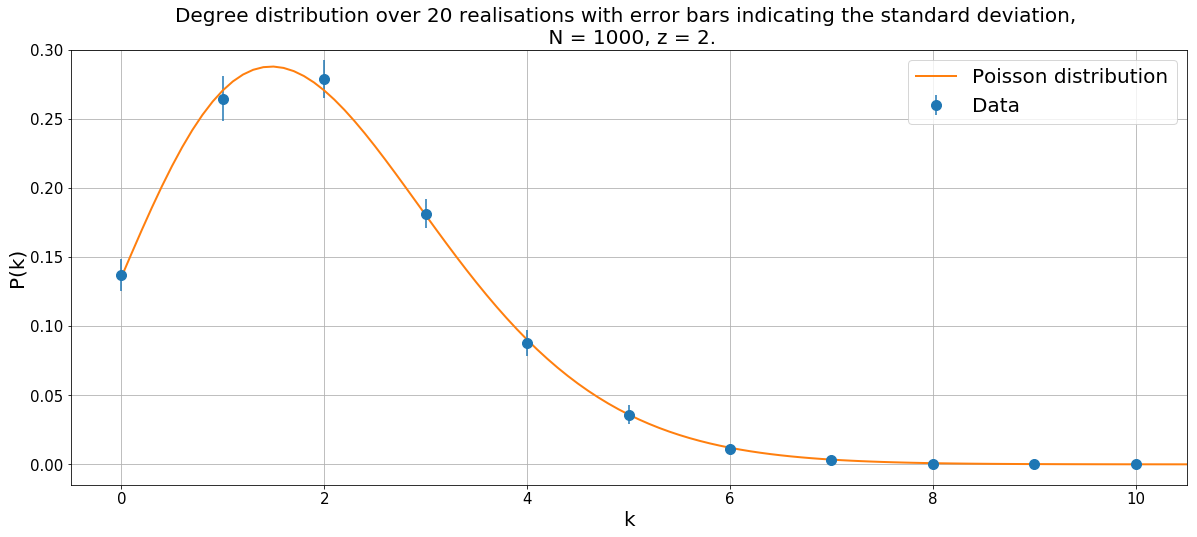

In [165]:
from scipy.stats import poisson
# pk = poisson.ppf(kvalues, av_degree)
# x = np.arange(0, 10, 0.1)

from scipy.misc import factorial

t = np.arange(0, 11, 0.1)
d = np.exp(-2)*np.power(2, t)/factorial(t)

plt.figure(figsize = (20, 8))
plt.errorbar(kvalues, Pk, yerr = std, marker = 'o', linestyle = 'none', label='Data', markersize = 10)
plt.plot(t, d, '-', label = "Poisson distribution", lw = 2)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlim(-0.5, 10.5)
plt.ylim(top = 0.3)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Degree distribution over 20 realisations with error bars indicating the standard deviation, \n N = 1000, z = 2.", fontsize=20)
plt.grid(True)
plt.legend(fontsize = 20)
# plt.savefig('degree_dist.eps') #save the figure into a file

In [232]:
m = 5
N = 1000
G = nx.barabasi_albert_graph(N, m) 

def k_nn(G,kmax):
    knn = np.zeros(kmax) #be careful if you get zeros! There are undefined ( can't divide through by zero)
    Degrees = list(dict(G.degree()).values())
    Degrees = np.array(Degrees)
    knn_i = np.array(list(nx.average_neighbor_degree(G).values()))
    for k in range(kmax):
        delta_ki_k = np.equal(Degrees, k).astype(int)
        numerator = np.sum(delta_ki_k*knn_i)
        denominator = np.sum(delta_ki_k)
        if denominator !=0:
            knn[k] = numerator/denominator
    return knn

Average = np.nanmean(M, axis = 1)

plt.figure(figsize = (20,8))
plt.plot(range(kmax), Average, 'x',markersize=10)
plt.title('K Nearest Neighbour calculations for N=1000, m=5, for 20 realisations',fontsize = 16)
plt.xlabel('k, Degree of node', fontsize = 16)
plt.ylabel(r'$k_{nn}(k)$ ', fontsize = 16)
plt.ylim(12,25)

NameError: name 'M' is not defined